In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/10/train_dataset.npz"
val = "Data/readelf/10/val_dataset.npz"
test = "Data/readelf/10/test_dataset.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x'][:1775]
y_train = training_dataset['y'][:1775]

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected: 92")
print("Data collection of XY simulated to 1% sampling rate, Dataset split: 67/20/5")
samples, timesteps, chunksize = x_train.shape
print("No. of samples: " + str(samples) + ", No. of timesteps: " + str(timesteps) + ", Chunksize: " + str(chunksize))
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, y_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected: 92
Data collection of XY simulated to 1% sampling rate, Dataset split: 67/20/5
No. of samples: 1775, No. of timesteps: 2560, Chunksize: 64
Training shape:  (1775, 2560, 64) (1775, 2560, 64)
Validation shape:  (500, 2560, 64) (500, 2560, 64)
Test shape:  (120, 2560, 64) (120, 2560, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(2560, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error')

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200, #change accordingly
                    batch_size=25, #change accordingly
                    validation_data=(x_val, y_val),
                    shuffle=False)

# Save the model
model.save("/home/isa/FYPJ/Model/model10.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2560, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1775 samples, validate on 500 samples
Epoch 1/200
1775/1775 [==============================] - 278s 157ms/step - loss: 0.0961 - val_loss: 0.0861
Epoch 2/200
1775/1775 [==============================] - 269s 152ms/step - loss: 0.0842 - val_loss: 0.0781
Epoch 3/200
1775/1775 [==============================] - 268s 151ms/step - loss: 0.0772 - val_loss: 0.0729
Epoch 4/200
1775/1775 [==============================] - 266s 150ms/step - loss: 0.0725 - val_loss: 0.0693
Epoch 5/200
1775/1775 [==============================] - 267s 150ms/step - loss: 0.0692 - val_loss: 0.0666
Epoch 6/200
1775/1775 [==============================] - 269s 151ms/step - loss: 0.0

1775/1775 [==============================] - 265s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 148/200
1775/1775 [==============================] - 264s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 149/200
1775/1775 [==============================] - 265s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 150/200
1775/1775 [==============================] - 261s 147ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 151/200
1775/1775 [==============================] - 259s 146ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 152/200
1775/1775 [==============================] - 265s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 153/200
1775/1775 [==============================] - 266s 150ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 154/200
1775/1775 [==============================] - 264s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 155/200
1775/1775 [==============================] - 264s 149ms/step - loss: 0.0426 - val_loss: 0.0424
Epoch 156/200
1775/1775 [========

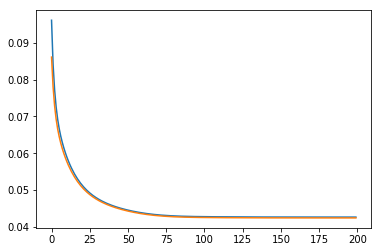

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

120/120 [==============================] - 3s 26ms/step
Test loss: 0.04148182570934296


In [6]:
x_predict = test_dataset['x'][:1]
predictions = model.predict(x_predict)
print(predictions[0][0]) # 1
print(predictions[0][1]) # 2 (1st row)
print(predictions[0][2]) # 1
print(predictions[0][3]) # 2 (2nd row)
print(predictions[0][4]) # 1
print(predictions[0][5]) # 2 (3rd row)
print(predictions[0][6]) # 1
print(predictions[0][7]) # 2 (4th row)
print(predictions[0][8]) # 1
print(predictions[0][9]) # 2 (5th row)
print(predictions[0][10])# 1
print(predictions[0][11])# 2 (6th row)
print(predictions[0][12])# 1
print(predictions[0][13])# 2 (7th row)
print(predictions[0][14])# 1
print(predictions[0][15])# 2 (8th row)
print(predictions[0][788])# 1
print(predictions[0][789])# 2 (OFFSET 0xC50)

[ 0.0000000e+00 -4.9997658e-07  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  2.1105069e-07  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.7963988e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  5.7449182e-07  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  1.6148406e-06
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.1633709e-06]
[ 3.24734160e-08 -7.998

In [12]:
print(predictions[0][212])# 1
print(predictions[0][213])# 2 (OFFSET 0xD50)

[ 0.0000000e+00 -0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00  1.3063593e-15 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  5.1961989e-18  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00]
[ 0.000000e+00 -0.00000